In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
path = './P14-Part4-Clustering/Section 26 - Hierarchical Clustering/Python/Mall_Customers.csv'

In [4]:
customers = pd.read_csv(path)

In [5]:
customers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
data = customers.iloc[:, [3,4]].values

In [7]:
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### find the number of clusters

In [10]:
methods = ['single', 'complete', 'average', 'ward', 'centroid', 'median']

Method: single


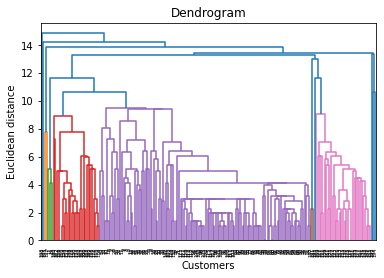

Method: complete


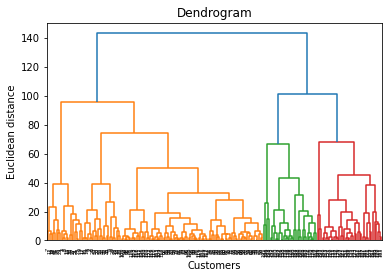

Method: average


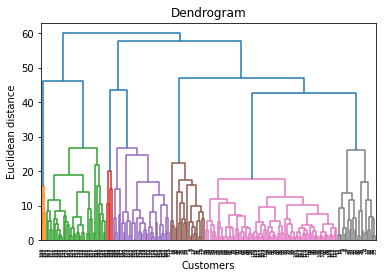

Method: ward


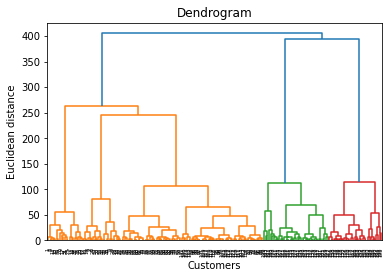

Method: centroid


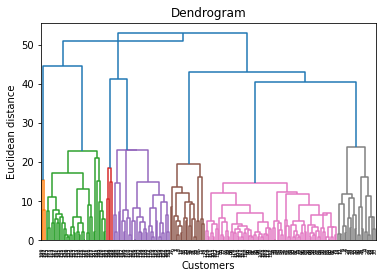

Method: median


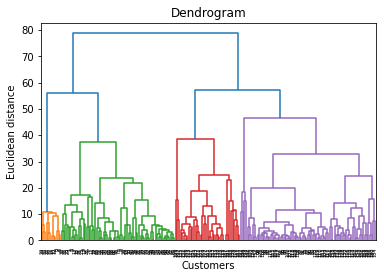

In [11]:
for method in methods:
    print(f'Method: {method}')
    dendrogram = sch.dendrogram(sch.linkage(data, method=method))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distance')
    plt.show()

#### train hierarchical clustering model on the dataset

In [37]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(data)

In [38]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [39]:
data[y_hc == 0, 0]

array([ 71,  71,  73,  73,  74,  75,  77,  78,  78,  78,  78,  78,  78,
        81,  85,  86,  87,  87,  87,  88,  88,  93,  97,  98,  99, 101,
       103, 103, 113, 120, 126, 137])

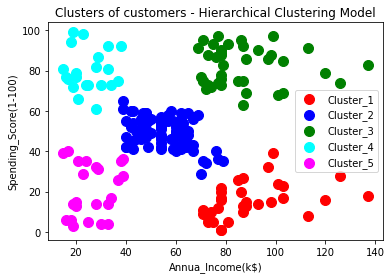

In [40]:
plt.scatter(data[y_hc == 0, 0], data[y_hc == 0, 1], s=100, c='red', label='Cluster_1')
plt.scatter(data[y_hc == 1, 0], data[y_hc == 1, 1], s=100, c='blue', label='Cluster_2')
plt.scatter(data[y_hc == 2, 0], data[y_hc == 2, 1], s=100, c='green', label='Cluster_3')
plt.scatter(data[y_hc == 3, 0], data[y_hc == 3, 1], s=100, c='cyan', label='Cluster_4')
plt.scatter(data[y_hc == 4, 0], data[y_hc == 4, 1], s=100, c='magenta', label='Cluster_5')
# plt.scatter(data[y_hc == 5, 0], data[y_hc == 5, 1], s=100, c='yellow', label='Cluster_6')
plt.title('Clusters of customers - Hierarchical Clustering Model')
plt.xlabel('Annua_Income(k$)')
plt.ylabel('Spending_Score(1-100)')
plt.legend()
plt.show()

In [ ]:
# high income with high spending score would be the target - Green in the above